### Import required packages

In [1]:
# import required packages
import numpy as np  # for numerical operations
import pandas as pd  # for data manipulation and analysis
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for enhanced data visualization
import warnings  # to suppress unnecessary warnings

# Suppress warnings to enhance code readability
warnings.filterwarnings("ignore")

### Load the Dataset

In [2]:
# reads 'car.data' as a pandas dataframe
df = pd.read_csv("../data/Air_Traffic_Passenger_Statistics.csv")

# displays the top 5 rows of the dataframe
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


### Handling Missing Values

In [3]:
# counting null values in each column of the dataframe
df.isna().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [4]:
# drop nan and duplicate values from the dataframe
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

### Summary Statistics

In [5]:
# gives summary stats for each field in the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Activity Period,14953.0,201044.583963,313.675658,200507.0,200803.0,201011.0,201308.0,201603.0
Passenger Count,14953.0,29345.619006,58398.448380,1.0,5409.0,9260.0,21222.0,659837.0
Adjusted Passenger Count,14953.0,29437.338862,58362.879319,1.0,5523.0,9418.0,21267.0,659837.0
Year,14953.0,2010.380325,3.140994,2005.0,2008.0,2010.0,2013.0,2016.0


### Data Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler

X = df[["Passenger Count"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Model Building

In [7]:
from sklearn.cluster import KMeans

model = KMeans(random_state=42)
model

KMeans(random_state=42)

### Elbow Plot

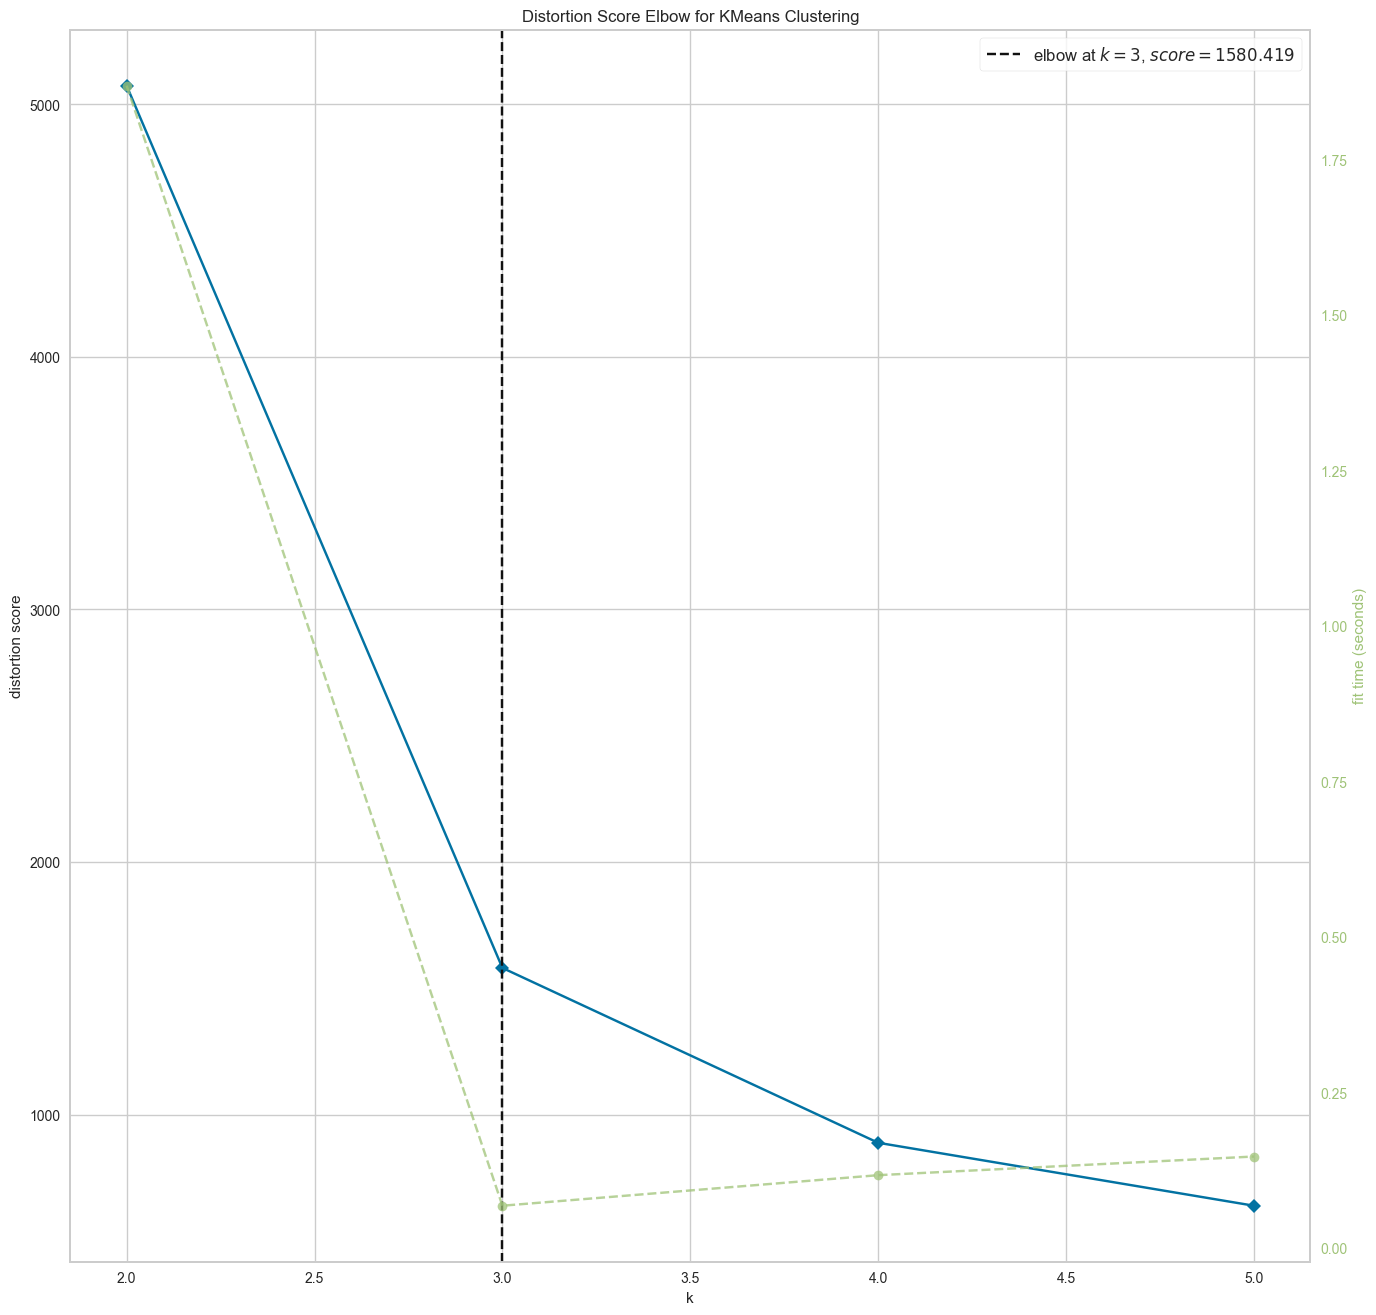

In [8]:
from yellowbrick.cluster import KElbowVisualizer

plt.figure(figsize=(16, 16))
visualizer = KElbowVisualizer(model, k=(2, 6))
visualizer.fit(X_scaled)
visualizer.show()
plt.show()

### Silhouette Score Plot

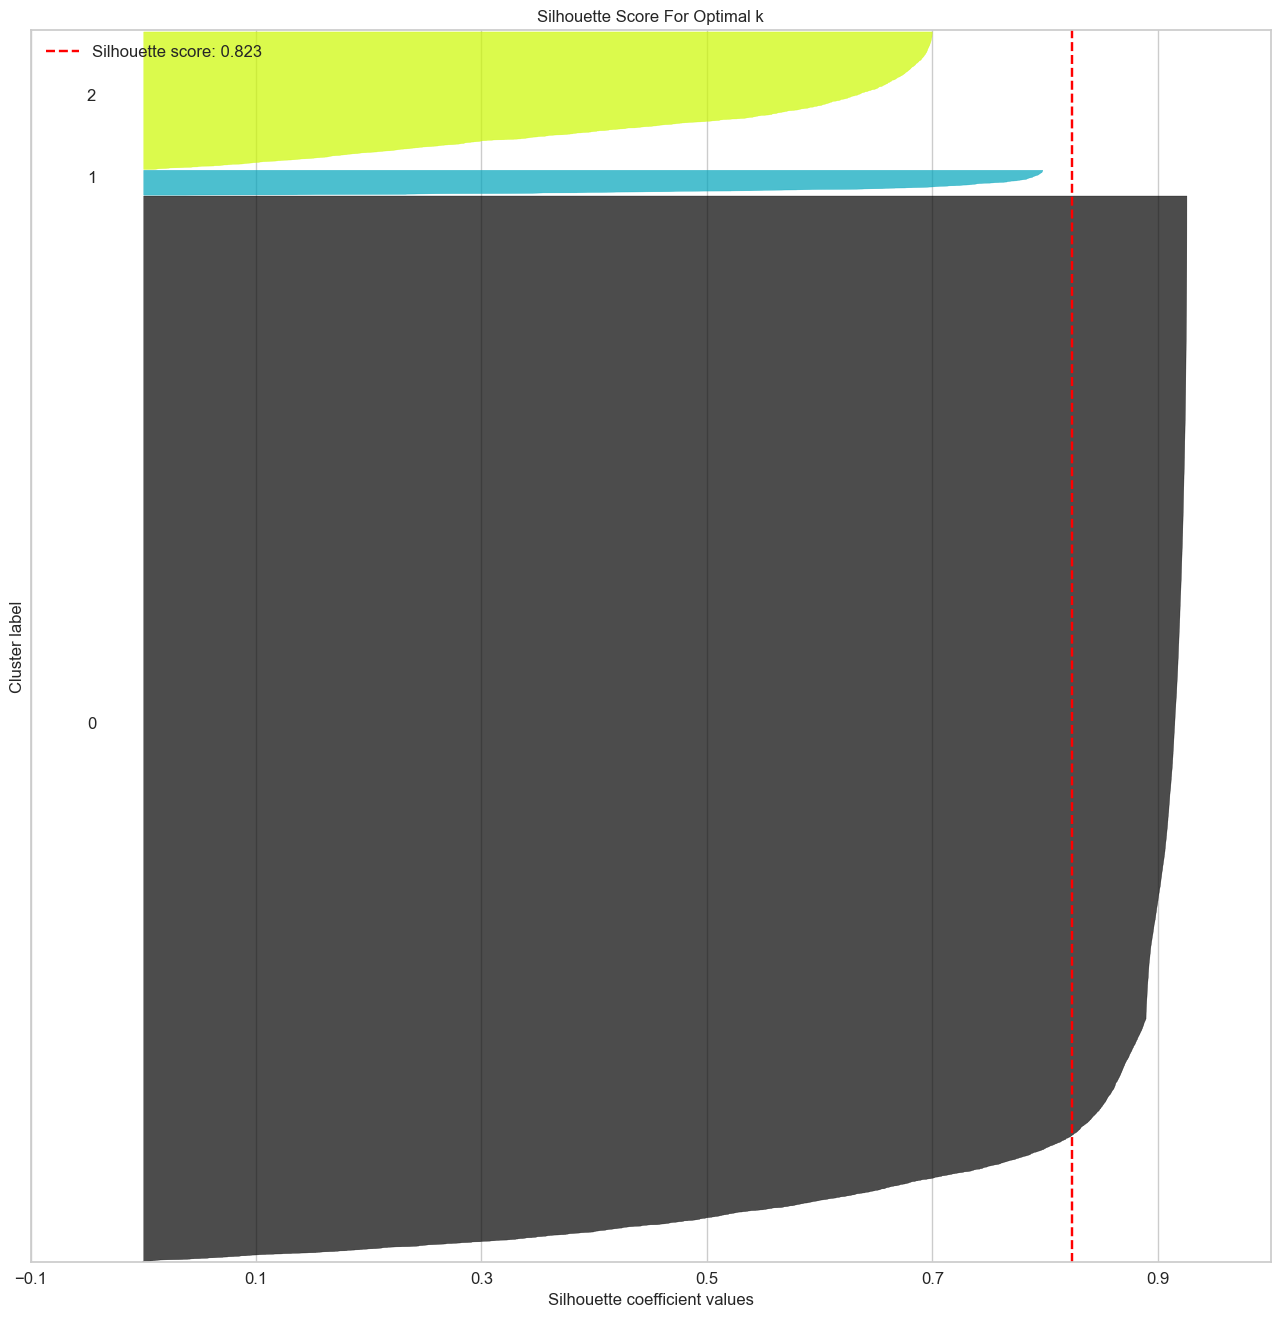

In [9]:
from scikitplot.metrics import plot_silhouette

# Get the optimal number of clusters
optimal_k = visualizer.elbow_value_

# Apply k-Means clustering with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans.fit(X_scaled)

# Add the cluster labels to the original dataset
df["Cluster"] = final_kmeans.labels_

# Plot the Silhouette Score
plot_silhouette(X_scaled, final_kmeans.labels_, figsize=(16, 16))
plt.title("Silhouette Score For Optimal k")
plt.show()